Did not converge after 1000 iterations


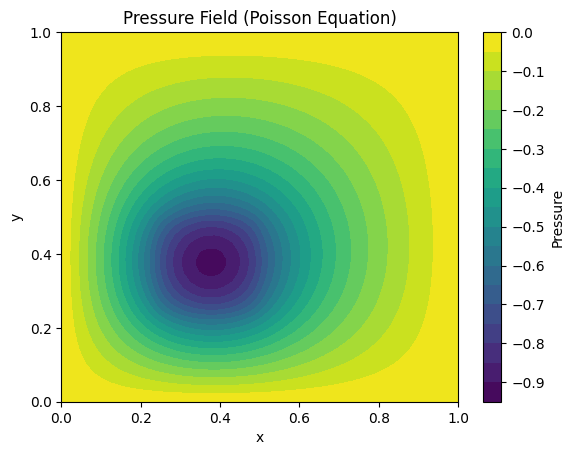

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Lx = 1.0
Ly = 1.0
Nx = 50
Ny = 50

dx = Lx / (Nx - 1)
dy = Ly / (Ny - 1)

x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)

# Pressure and source
p = np.zeros((Nx, Ny))
f = np.zeros((Nx, Ny))
f[Nx//4:Nx//2, Ny//4:Ny//2] = 50.0

# Dirichlet boundaries
p[0, :] = 0
p[-1, :] = 0
p[:, 0] = 0
p[:, -1] = 0

max_iter = 1000
tolerance = 1e-6

for it in range(max_iter):
    p_old = np.copy(p)
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            
            p[i, j] = (
                (p[i+1, j] + p[i-1, j]) / dx**2
                + (p[i, j+1] + p[i, j-1]) / dy**2
                - f[i, j]
            ) / (2.0 * (1.0/dx**2 + 1.0/dy**2))

    # Convergence check
    diff = np.linalg.norm(p - p_old)
    base = np.linalg.norm(p_old)
    if base > 1e-14:  # guard against division by zero
        if diff / base < tolerance:
            print("Converged after", it+1, "iterations")
            break
else:
    print("Did not converge after", max_iter, "iterations")

plt.contourf(X, Y, p.T, 20, cmap='viridis')
plt.colorbar(label="Pressure")
plt.title("Pressure Field (Poisson Equation)")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig('PressurePoisson1.png', dpi=300, format='png') 
plt.show()

